
# Multiple Linear Regression

Assuming simple linear regression has been covered

DHL offers a same-day delivery service. You are able to use Google maps to group individual dleiveries into one trip. Some trips have more than one delivery. You want to estimate how long a delivery will take based on:
1. Total distance of the trip in km
2. The number of deliveries that must be made during the trip 

To conduct the analysis, take a random sample of 10 past trips and record:
1. Total kilometres travelled
2. Number of deliveries
3. Total time in hours

|kilometres_travelled(x_1)|#deliveries(x_2)|travel_time(hrs, y)|
|---|---|---|
|89|4|7|
|66|1|5.4|
|78|3|6.6|
|111|6|7.4|
|44|1|4.8|
|77|3|6.4|
|80|3|7|
|66|2|5.6|
|109|5|7.3|
|76|3|6.4|


In what way does travel time depend on the other two variables?
Travel time is the dependent variable also sometimes called response, and kilometres travelled and number of deliveries are independent variables also called predictor.

Correlation values:
- 0.8 to 1.0 and -0.8 to -1.0 Perfect or very strong correlation
- 0.6 to 0.8 and -0.6 to -0.8 Strong correlation
- 0.4 to 0.6 and -0.4 to -0.6 Moderate correlation
- 0.2 to 0.4 and -0.2 to -0.4 Weak correlation
- 0.0 to 0.2 and -0.2 to 0.0 No correlation

**New Considerations**
1. Add more independent variables to multiple linear progression procedure does not mean that it will be "better" or offer better predictions. In fact, it can make things worse. This is called **overfitting**
2. The addition of more independent variables creates more relationships among variable. So not only are the independent variables related to the dependent variable, they are also related to each other. When this happens it is called multi-colinearity.
3. The ideal is for all of the independent variables to be correlated with the dependent variable but **not** with each other.
4. Because of multi-colinearity and overfitting, there is a fair amount of prep-work to do before conducting multiple linear regression.
- Correlations
- Scatterplots
- Simple regressions between each independent variable and the dependent variable

-If two independent variables are related to each other we are not sure which one is explaining the variation in the dependent variable.
-If we put sea salt and table salt into our dinner and our dinner is salty we don't know which one is driving the salty taste.
- $n(n-1)/2$ will tell us the number of relationships between the independent variables. There are are addition $n$ relationships between the independent variables and the dependent variable
- Some independent variables, or sets of independent variables, are better at predicting the dependent variable than others. Some contribute nothing.


***Multiple linear regression model

$ y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_px_p + \epsilon$

Multiple regression equation:

$ y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_px_p$
error term is assumed to be zero

Estimated multiple regression equations:

$ \hat{y} = b_0 + b_1x_1 + b_2x_2 + \dots + b_px_p$

$\hat{y}$ is the predicted value of the dependent variable. $b_0 \dots b_p$ estimates of $\beta_0 \dots \beta_p$

$ \hat{y} = 6.211 + 0.014x_1 + 0.383x_2 - 0.607x_3$

$\hat{y} = 27 + 9x_1 + 12x_2$
- $x_1$ =  capital investment (€1000's)
- $x_2$ = marketing expenditure (€1000's)
- $\hat{y}$ = predicted sales (€1000's)
- Each coefficient is interpreted as the estimated change in $y$ corresponding to a 1 unit change in a variable when all other variables are held fixed.

**Review**
1. Multiple regression is an extension of linear regression
2. Two or more independent variables are used to predict/explain the variance in one dependent variable
3. Two problems that arise- overfitting and multi-colinearity
4. Overfitting is caused by adding too many independent variables. They account for more of the variance but they add nothing to the model
5. Multi-colinearity happens when some/all of the independent variables are correlated to each other
6. In multiple regression each coefficient is interpreted as the estimated change in $y$ corresponding to a one unit change in a variable, when all the other variables are kept fixed

As the owner of DHL you would like to able to estimate delivery time based on three factors:
- The total distance in kilometres
- The number of deliveries
- The price of petrol

**Multiple linear regression prep**
1. Generate a list of potential variables, independent and dependent
2. Collect data for the variables
3. Check the relationships between independent variable and the dependent variable using scatterplots and correlations
4. Check the relationships between the independent variables using scatterplots and correlations
5. (Optional) Conduct simple linear regression for IV/DV pair
6. Use the non-redundant independent variables in the analysis to find the best fitting model
7. Use the best-fitting model to make predictions about the dependent variable

|kilometres_travelled(x_1)|#deliveries(x_2)|petrol prices (x_3)|travel_time(hrs, y)|
|---|---|---|---|
|89|4|3.84|7|
|66|1|3.19|5.4|
|78|3|3.78|6.6|
|111|6|3.89|7.4|
|44|1|3.57|4.8|
|77|3|3.57|6.4|
|80|3|3.03|7|
|66|2|3.51|5.6|
|109|5|3.54|7.3|
|76|3|3.25|6.4|

In [1]:
km_travelled = [89, 66, 78, 111, 44, 77, 80, 66, 109, 76]
time_taken = [7, 5.4, 6.6, 7.4, 4.8, 6.4, 7, 5.6, 7.3, 6.3]
num_deliveries = [4, 1, 3, 6, 1, 3, 3, 2, 5, 3]
petrol_prices = [3.84, 3.19, 3.78, 3.89, 3.57, 3.57, 3.03, 3.51, 3.54, 3.25]

In [2]:
print(len(km_travelled))
print(len(time_taken))
print(len(num_deliveries))
print(len(petrol_prices))

10
10
10
10


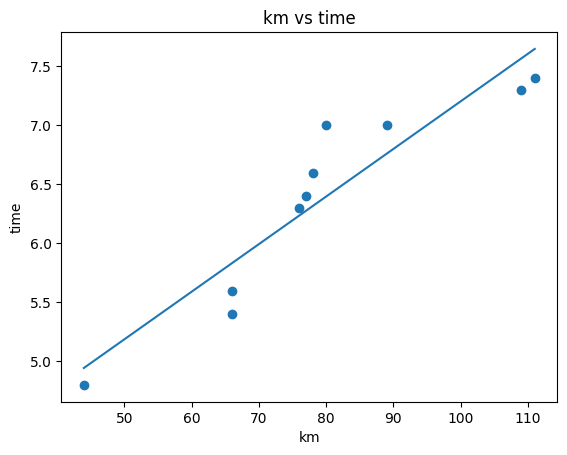

In [3]:
from matplotlib import pyplot as plt
import numpy as np
plt.title("km vs time")
plt.xlabel("km")
plt.ylabel("time")
plt.scatter(km_travelled, time_taken)
plt.plot(np.unique(km_travelled), np.poly1d(np.polyfit(km_travelled, time_taken, 1))(np.unique(km_travelled)))
plt.show()

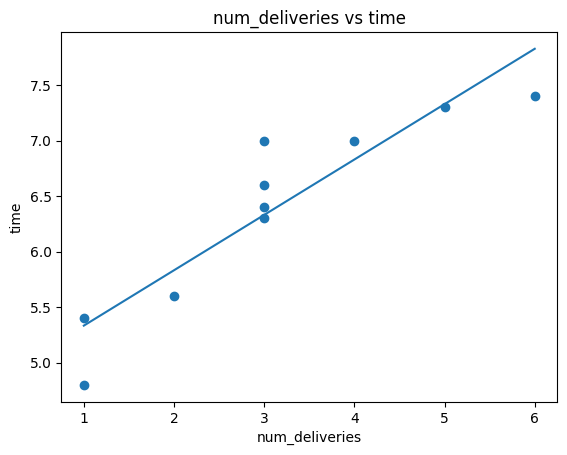

In [4]:
plt.title("num_deliveries vs time")
plt.xlabel("num_deliveries")
plt.ylabel("time")
plt.scatter(num_deliveries, time_taken)
plt.plot(np.unique(num_deliveries), np.poly1d(np.polyfit(num_deliveries, time_taken, 1))(np.unique(num_deliveries)))
plt.show()

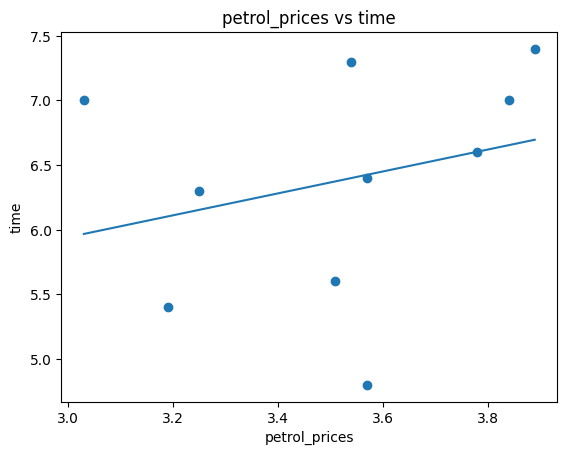

In [5]:
plt.title("petrol_prices vs time")
plt.xlabel("petrol_prices")
plt.ylabel("time")
plt.scatter(petrol_prices, time_taken)
plt.plot(np.unique(petrol_prices), np.poly1d(np.polyfit(petrol_prices, time_taken, 1))(np.unique(petrol_prices)))
plt.show()

**Scatterplot summary**
Dependent variable versus each independent variable
- travel_time appears to be highly correlated with km_travelled. Linear relationship
- travel_time appears to be highly correlated with num_deliveries. Linear relationship
- travel_time does not appear to be correlated with petrol prices. No linear relationship
- since petrol prices are not correlated with the dependent variable we would remove it a this point
- I will leave it in for teaching


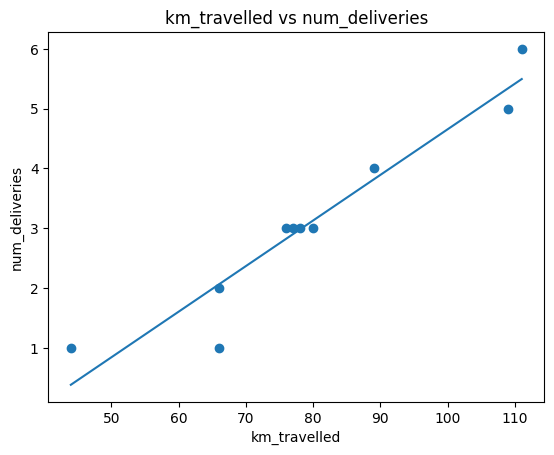

In [6]:
plt.title("km_travelled vs num_deliveries")
plt.xlabel("km_travelled")
plt.ylabel("num_deliveries")
plt.scatter(km_travelled, num_deliveries)
plt.plot(np.unique(km_travelled), np.poly1d(np.polyfit(km_travelled, num_deliveries, 1))(np.unique(km_travelled)))
plt.show()

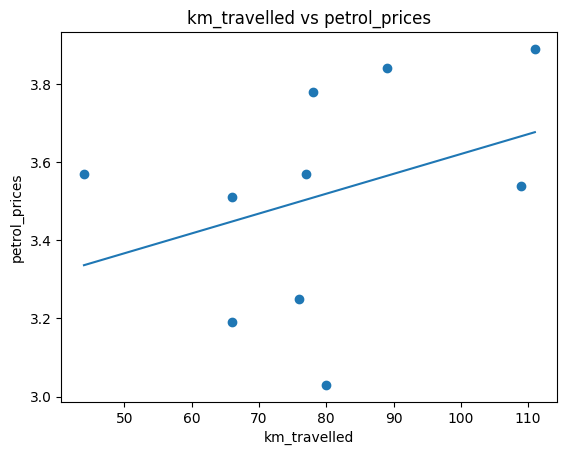

In [7]:
plt.title("km_travelled vs petrol_prices")
plt.xlabel("km_travelled")
plt.ylabel("petrol_prices")
plt.scatter(km_travelled, petrol_prices)
plt.plot(np.unique(km_travelled), np.poly1d(np.polyfit(km_travelled, petrol_prices, 1))(np.unique(km_travelled)))
plt.show()

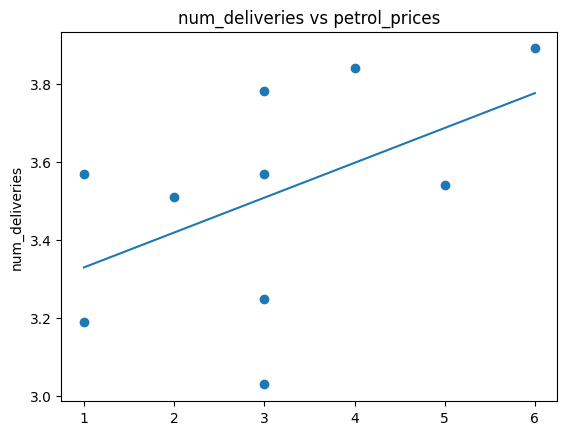

In [8]:
plt.title("num_deliveries vs petrol_prices")
plt.ylabel("num_deliveries")
plt.scatter(num_deliveries, petrol_prices)
plt.plot(np.unique(num_deliveries), np.poly1d(np.polyfit(num_deliveries, petrol_prices, 1))(np.unique(num_deliveries)))
plt.show()

**IV to IV scatterplots**
1. km_travelled and num_deliveries have a very strong linear relationship. This is multi-colinearity which is bad for our model
2. km_travelled and petrol_prices have no correlation. This is good.
3. num_deliveries and petrol_prices have no correlations. This is good.

- Since num_deliveries is highly correlated with km_travelled, we would not use both in the multiple linear regression. At this point I would remove num_deliveries because km_travelled has a higher correlation with the dependent variable.
- For teaching purposes I will leave everything in

In [9]:
from scipy.stats import pearsonr
corr = pearsonr(km_travelled, time_taken)
print(corr)

PearsonRResult(statistic=np.float64(0.9300044244943915), pvalue=np.float64(9.645099489944713e-05))


In [10]:
corr = pearsonr(num_deliveries, time_taken)
print(corr)

PearsonRResult(statistic=np.float64(0.9167726827874293), pvalue=np.float64(0.000189667778726026))


In [11]:
corr = pearsonr(petrol_prices, time_taken)
print(corr)

PearsonRResult(statistic=np.float64(0.2790440314152355), pvalue=np.float64(0.4349416182280528))


- In these results first value is the correlation and the second value is the p-value
- If the p-value is below 0.05 we say that it is statistically significant
- Correlation between km_travelled and time is 0.93 with a p-value - 0.00009. This is a perfect correlation and it extremely significant.
- Correlation between num_deliveries and time is 0.917 with a p-value - 0.00018. This is a perfect correlation and it extremely significant.
- Correlation between petrol_prices and time is 0.279 which is weak and the p-value is 0.434. This is way above 0.05 telling us that this is just a random correlation.

In [12]:
corr = pearsonr(km_travelled, num_deliveries)
print(corr)

PearsonRResult(statistic=np.float64(0.9558982066200347), pvalue=np.float64(1.5690314407660616e-05))


In [13]:
corr = pearsonr(petrol_prices, km_travelled)
print(corr)

PearsonRResult(statistic=np.float64(0.35579623354708517), pvalue=np.float64(0.3129640590817897))


In [14]:
corr = pearsonr(petrol_prices, num_deliveries)
print(corr)

PearsonRResult(statistic=np.float64(0.4982421647401633), pvalue=np.float64(0.14274120767031906))


- km_travelled and num_deliveries correlation is 0.956 which is perfect correlation with a p-value of 0.00001. This is a disaster. These two independent variables can't be included together.
- km_travelled and petrol_prices correlation 0.356, p-value is 0.313. This is good. 
- num_deliveries and petrol_prices correlation 0.498, p-value is 0.142. This is good.

**Correlation Summary**
- Correlations confirm what we saw in the scatterplots
- Non-contributing variable - petrol_prices is not correlated with the dependent variable and should be excluded
- Redundant multi-colinear variables km_travelled and num_deliveries are both highly correlated with each other and so one of them is redundant, only one should be included in the analysis.

**Single variable regression**
1. In the first step we will do single variable regression between each independent variable and the dependent variable
2. We will interpret the results.
3. We will note changes in:
- coefficents values for t-statistic and p-value
- analysis of variance (ANOVA), F-value, p-value
- R squared, R-squared adjusted
- VIF variance inflation factor
- Mallows Cp (pick best model)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
km_travelled = np.array(km_travelled).reshape(-1, 1)
model.fit(km_travelled, time_taken)
r_sq = model.score(km_travelled, time_taken)
print(r_sq)

0.8649082295791441


- R squared is the % of variation in the dependent variable explained by the independent variable. 
- Standard error (SE) of the regression is the average distance of the points away from the regression line 

In [16]:
import statsmodels.api as sm
km_travelled = sm.add_constant(km_travelled)
model = sm.OLS(time_taken, km_travelled)
result = model.fit()
print(result.summary())
# Print the standard error
print(result.scale**0.5)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     51.22
Date:                Mon, 16 Feb 2026   Prob (F-statistic):           9.65e-05
Time:                        12:28:54   Log-Likelihood:                -2.2344
No. Observations:                  10   AIC:                             8.469
Df Residuals:                       8   BIC:                             9.074
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1676      0.461      6.865      0.0

In [17]:
# Work out R-squared predicted
influence = result.get_influence()
#Calculate PRESS statistic
press = np.sum((result.resid/(1-influence.hat_matrix_diag))**2)
#calculate predicted R squared
sst = result.centered_tss
predicted_r2 = 1-(press/sst)
print(f"Predicted r squared {predicted_r2:.4f} ")

Predicted r squared 0.7978 


- On average our points at 0.338 hrs away from the regression line
- SE is a measure of how tightly around the regression line our data points are
- Anova - significance of the overall model
- F-statistic 51.22 p-value is 9.65 x e-05
- $x_1$ km_travelled
- coeff of $x_1$ is 0.0404. This means for every km travelled the time increases by about 2.4 minutes.
- Regression equation is $\hat{y} = 3.1676 + 0.0404x_1$
- To estimate an 84km trip 
- $\hat{y} = 3.1676 + 0.0404(84) = 6.5612$ hours
- $\hat{y} = 6.5612 \pm 2.31(0.338)$
- 2.31 comes from the t-distribution with 8df and 95% confidence
- with 95% confidence travel time is 5.78042 - 7.34198

In [18]:
num_deliveries = sm.add_constant(num_deliveries)
model = sm.OLS(time_taken, num_deliveries)
result = model.fit()
print(result.summary())
# Print the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     42.15
Date:                Mon, 16 Feb 2026   Prob (F-statistic):           0.000190
Time:                        12:28:54   Log-Likelihood:                -3.0657
No. Observations:                  10   AIC:                             10.13
Df Residuals:                       8   BIC:                             10.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8341      0.265     18.243      0.0

In [19]:
# Work out R-squared predicted
influence = result.get_influence()
#Calculate PRESS statistic
press = np.sum((result.resid/(1-influence.hat_matrix_diag))**2)
#calculate predicted R squared
sst = result.centered_tss
predicted_r2 = 1-(press/sst)
print(f"Predicted r squared {predicted_r2:.4f} ")

Predicted r squared 0.7073 


In [20]:
petrol_prices = sm.add_constant(petrol_prices)
model = sm.OLS(time_taken, petrol_prices)
result = model.fit()
print(result.summary())
# Print the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                 -0.037
Method:                 Least Squares   F-statistic:                    0.6755
Date:                Mon, 16 Feb 2026   Prob (F-statistic):              0.435
Time:                        12:28:54   Log-Likelihood:                -11.838
No. Observations:                  10   AIC:                             27.68
Df Residuals:                       8   BIC:                             28.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3986      3.638      0.934      0.3

**Compare the three single variable models**
|SE|Rsa|F|p|AIC|BIC|
|---|---|---|---|---|---|
|0.338|0.848|51.22|0|8.469|9.074|
|0.367|0.821|42.15|0|10.13|10.74|
|0.88|-0.037|0.6755|0.43|27.68|28.28|

In [21]:
km_travelled = [89, 66, 78, 111, 44, 77, 80, 66, 109, 76]
num_deliveries = [4, 1, 3, 6, 1, 3, 3, 2, 5, 3]
petrol_prices = [3.84, 3.19, 3.78, 3.89, 3.57, 3.57, 3.03, 3.51, 3.54, 3.25]
data = list(zip(km_travelled, num_deliveries))
print(data)
data = sm.add_constant(data)
model = sm.OLS(time_taken, data)
result = model.fit()
print(result.summary())
# Print the standard error
print(result.scale**0.5)
# Work out R-squared predicted
influence = result.get_influence()
#Calculate PRESS statistic
press = np.sum((result.resid/(1-influence.hat_matrix_diag))**2)
#calculate predicted R squared
sst = result.centered_tss
predicted_r2 = 1-(press/sst)
print(f"Predicted r squared {predicted_r2:.4f} ")

[(89, 4), (66, 1), (78, 3), (111, 6), (44, 1), (77, 3), (80, 3), (66, 2), (109, 5), (76, 3)]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     24.25
Date:                Mon, 16 Feb 2026   Prob (F-statistic):           0.000713
Time:                        12:28:54   Log-Likelihood:                -1.8917
No. Observations:                  10   AIC:                             9.783
Df Residuals:                       7   BIC:                             10.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [22]:
# Work out R-squared predicted
influence = result.get_influence()
#Calculate PRESS statistic
press = np.sum((result.resid/(1-influence.hat_matrix_diag))**2)
#calculate predicted R squared
sst = result.centered_tss
predicted_r2 = 1-(press/sst)
print(f"Predicted r squared {predicted_r2:.4f} ")

Predicted r squared 0.6178 


In [23]:
km_travelled = [89, 66, 78, 111, 44, 77, 80, 66, 109, 76]
num_deliveries = [4, 1, 3, 6, 1, 3, 3, 2, 5, 3]
petrol_prices = [3.84, 3.19, 3.78, 3.89, 3.57, 3.57, 3.03, 3.51, 3.54, 3.25]
data = list(zip(km_travelled, petrol_prices))
print(data)
data = sm.add_constant(data)
model = sm.OLS(time_taken, data)
result = model.fit()
print(result.summary())
# Print the standard error
print(result.scale**0.5)
# Work out R-squared predicted
influence = result.get_influence()
#Calculate PRESS statistic
press = np.sum((result.resid/(1-influence.hat_matrix_diag))**2)
#calculate predicted R squared
sst = result.centered_tss
predicted_r2 = 1-(press/sst)
print(f"Predicted r squared {predicted_r2:.4f} ")

[(89, 3.84), (66, 3.19), (78, 3.78), (111, 3.89), (44, 3.57), (77, 3.57), (80, 3.03), (66, 3.51), (109, 3.54), (76, 3.25)]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     23.01
Date:                Mon, 16 Feb 2026   Prob (F-statistic):           0.000836
Time:                        12:28:54   Log-Likelihood:                -2.1192
No. Observations:                  10   AIC:                             10.24
Df Residuals:                       7   BIC:                             11.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------

In [24]:
km_travelled = [89, 66, 78, 111, 44, 77, 80, 66, 109, 76]
num_deliveries = [4, 1, 3, 6, 1, 3, 3, 2, 5, 3]
petrol_prices = [3.84, 3.19, 3.78, 3.89, 3.57, 3.57, 3.03, 3.51, 3.54, 3.25]
data = list(zip(num_deliveries, petrol_prices))
print(data)
data = sm.add_constant(data)
model = sm.OLS(time_taken, data)
result = model.fit()
print(result.summary())
# Print the standard error
print(result.scale**0.5)
# Work out R-squared predicted
influence = result.get_influence()
#Calculate PRESS statistic
press = np.sum((result.resid/(1-influence.hat_matrix_diag))**2)
#calculate predicted R squared
sst = result.centered_tss
predicted_r2 = 1-(press/sst)
print(f"Predicted r squared {predicted_r2:.4f} ")

[(4, 3.84), (1, 3.19), (3, 3.78), (6, 3.89), (1, 3.57), (3, 3.57), (3, 3.03), (2, 3.51), (5, 3.54), (3, 3.25)]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     26.29
Date:                Mon, 16 Feb 2026   Prob (F-statistic):           0.000556
Time:                        12:28:54   Log-Likelihood:                -1.5372
No. Observations:                  10   AIC:                             9.074
Df Residuals:                       7   BIC:                             9.982
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [25]:
km_travelled = [89, 66, 78, 111, 44, 77, 80, 66, 109, 76]
num_deliveries = [4, 1, 3, 6, 1, 3, 3, 2, 5, 3]
petrol_prices = [3.84, 3.19, 3.78, 3.89, 3.57, 3.57, 3.03, 3.51, 3.54, 3.25]
data = list(zip(km_travelled, num_deliveries, petrol_prices))
print(data)
data = sm.add_constant(data)
model = sm.OLS(time_taken, data)
result = model.fit()
print(result.summary())
# Print the standard error
print(result.scale**0.5)
# Work out R-squared predicted
influence = result.get_influence()
#Calculate PRESS statistic
press = np.sum((result.resid/(1-influence.hat_matrix_diag))**2)
#calculate predicted R squared
sst = result.centered_tss
predicted_r2 = 1-(press/sst)
print(f"Predicted r squared {predicted_r2:.4f} ")

[(89, 4, 3.84), (66, 1, 3.19), (78, 3, 3.78), (111, 6, 3.89), (44, 1, 3.57), (77, 3, 3.57), (80, 3, 3.03), (66, 2, 3.51), (109, 5, 3.54), (76, 3, 3.25)]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     16.51
Date:                Mon, 16 Feb 2026   Prob (F-statistic):            0.00264
Time:                        12:28:54   Log-Likelihood:                -1.1170
No. Observations:                  10   AIC:                             10.23
Df Residuals:                       6   BIC:                             11.44
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|   

$R^2$ is your go to metric for seeing how well your model fits the data
1. $R^2$ measures the proportion of variance in the dependent variable that is predictable from the independent variables
- Tells you how much of th variance in the dependent variable you can explain
- The flaw: $R^2$ will never decrease when add more variables, even if the variables are complete nonsense. This can lead to overfitting

2. Adjusted $R^2$ compensates for the number of variables in your model. It only increases if the variable improves the model more than would be expected by chance.
- Tells you if the extra variable was useful or not
- Unlike $R^2$, adjusted $R^2$ can decrease if you add useless independent variables. It is a more honest metric when comparing with models with different numbers of independent variables.

3. Predicted $R^2$
- while the first two look at how well the model fits the test data, predicted $R^2$ tells you how well model works with new observations
- its calculated by systematically removing each data points from the set, refitting the model and seeing how well the model predicts that data points (cross validation)
- its tells you if you can trust the model in the real of did it just memorise the test data
- if you have $R^2$ is 0.9 but predicted $R^2$ is 0.2 your model of overfitted.
- It is great at explaining the past but terrible at predicting the future

In [26]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
df = pd.DataFrame({
    'km_travelled' : km_travelled,
    'num_deliveries' : num_deliveries,
    'petrol_prices' : petrol_prices,
    'time_taken' : time_taken
})
X = df[['km_travelled', 'num_deliveries', 'petrol_prices']]
X = add_constant(X)
#Calculate VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

          feature         VIF
0           const  453.235497
1    km_travelled   14.936013
2  num_deliveries   17.353065
3   petrol_prices    1.713803


VIF detects multi-colinearity. It measures how much the variance of an estimated regression coefficient is increased due to multi-colinearity. 
- the VIF tells you how much of the signal in one variable is actually just a reflection of the others
- VIF = 1: No correlation at all
- VIF between 1 and 5: Moderate correlation, usually acceptable
- VIF > 5 or 10: High correlation. Your coefficients become unreliable and p-values might be misleading 

In [27]:
# Define the full model (use all independent variables)
# We need the MSE from this model to act as our 'true' estimate
X_full = sm.add_constant(df[['km_travelled', 'num_deliveries', 'petrol_prices']])
y = df['time_taken']
full_res = sm.OLS(y, X_full).fit()
mse_full = full_res.mse_resid
#Define the subset model
X_sub = sm.add_constant(df[['petrol_prices']])
sub_res = sm.OLS(y, X_sub).fit()
#Calculate Mallows C_p
rss_sub = sub_res.ssr
n = len(y)
p = len(sub_res.params)
mallows_cp = (rss_sub/mse_full) - n + (2*p)
print(f"Mallows C_p for subset model: {mallows_cp:.4f}")
print(f"Number of parameters (p): {p}")


Mallows C_p for subset model: 45.2117
Number of parameters (p): 2


- Mallows $C_p$ is a technique for model selection to identify which subset of predictors creates the best model without overfitting.
-The goal is to find model that is small enough to be easy to interpret, but large enough to capture the actual relationships between the variables
- With Mallows $C_p$ you are looking for a relationship between the $C_p$ value and the number of independent variables
- Ideal model: $C_p \approx p+1$
- Overfit model: $C_p < p+1$
- Underfit model: $C_p > p+1$


DoerUppers buys, remodels and sells houses. You want to develop a house pricing model. We will use data such as list price, square footage, numbers of bedrooms, number of bathrooms. We want to consider another question. Is the secondary school in the neighbourhood excellent or not and how is this related to house prices?
- Secondary school rating is not quantitative it is qualitative (categorical). For each home the secondary school is either excellent or not.

**Home Price data**
|price (1000)(y)|sqrt(x_1)|excellent ss(x_2)|
|---|---|---|
|145|1872|NE|
|69.9|1954|NE|
|315|4104|E|
|144.9|1524|NE|
|134.9|1297|NE|
|369|3278|E|
|95|1192|NE|
|228.9|2252|E|
|149|1620|NE|
|295|2466|E|
|388.5|3188|E|
|75|1061|NE|
|130|1195|NE|
|174|1552|E|
|334.9|2901|E|

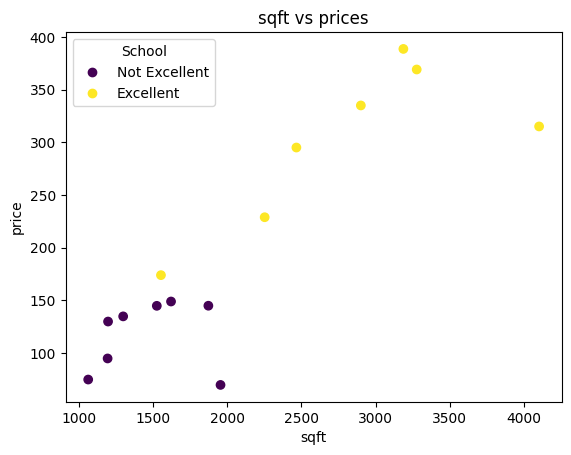

In [28]:
prices = [145, 69.9, 315, 144.9, 134.9, 369, 95, 228.9, 149, 295, 388.5, 75, 130, 174, 334.9]
sqft = [1872, 1954, 4104, 1524, 1297, 3278, 1192, 2252, 1620, 2466, 3188, 1061, 1195, 1552, 2901]
ess = [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1]
names = ["Not Excellent", "Excellent"]
plt.title("sqft vs prices")
plt.xlabel("sqft")
plt.ylabel("price")
scatter = plt.scatter(sqft, prices, c=ess)
plt.legend(handles=scatter.legend_elements()[0], labels = names, title="School")


$E(y) = \beta_0 + \beta_1x_1 + \beta_2x_2$
Expected value given that the secondary school is not excellent
$E(y) = \beta_0 + \beta_1x_1 +\beta_2(0)$
$E(y) = \beta_0 + \beta_1x_1$
- Expected value of the house price given that the secondary school is excellent
$E(y) = \beta_0 + \beta_1x_1 + \beta_2(1)$





In [32]:
all_data = list(zip(sqft, ess))
all_data_c = sm.add_constant(all_data)
model = sm.OLS(prices, all_data_c)
result = model.fit()
print(result.summary())
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     35.94
Date:                Mon, 16 Feb 2026   Prob (F-statistic):           8.57e-06
Time:                        12:32:39   Log-Likelihood:                -76.595
No. Observations:                  15   AIC:                             159.2
Df Residuals:                      12   BIC:                             161.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.0749     33.690      0.804      0.4

$E(y) = 27.1 + 0.0621x_1 + 98.6x_2$
- sqft: Every square ft is related a 60 euro increase in price
- ess: On average a home here is worth an additional 98,600

You are interested in two questions:
1. Is the secondary school excellent?
2. What region of the city (NSEW) of the city is the home located and is that related to house price?

In [2]:
prices = [
    525000, 192000, 270000, 282000, 292500, 565000, 385000, 380000, 310000, 550000,
    405000, 332500, 400000, 275000, 455000, 445000, 420000, 740000, 162000, 300000,
    392000, 285000, 255000, 190000, 475000, 478250, 205000, 420000, 268690, 865000,
    360000, 375000, 392500, 226000, 770000, 148000, 175000, 225000, 171000, 430000,
    312500, 290000, 325000, 265000, 180000, 102500, 189000, 362500, 280000, 185000,
    264000, 361234, 100000, 165000, 342000, 471000, 624000, 502000, 731000, 926000,
    384000, 439000, 724000, 317000, 391000, 455000, 297500, 260000, 224000, 165000,
    395000, 256562, 330396, 305000, 300000, 257500, 279779, 302500, 260000, 265000,
    294500, 300000, 294780, 510000, 425000, 380000, 195000, 215000, 335000, 410000,
    440000, 320000, 275000, 230000, 195000, 580000, 650000, 245000, 210000, 315000
]

sq_meters = [
    164, 91, 75, 104, 93, 206, 150, 118, 130, 182,
    158, 105, 128, 81, 194, 148, 112, 388, 58, 145,
    116, 106, 95, 85, 148, 155, 78, 140, 102, 280,
    120, 125, 130, 88, 310, 72, 80, 92, 82, 142,
    115, 110, 120, 105, 90, 65, 88, 135, 108, 85,
    102, 132, 60, 82, 110, 125, 160, 140, 185, 250,
    100, 115, 190, 65, 85, 110, 112, 105, 95, 80,
    130, 100, 125, 118, 115, 105, 110, 116, 100, 102,
    112, 115, 114, 175, 145, 130, 92, 98, 128, 140,
    155, 118, 105, 95, 85, 200, 220, 102, 90, 115
]

excellent_secondary_school = [
    True, False, False, True, True, True, True, True, True, True,
    True, True, True, False, True, True, True, True, False, True,
    True, True, True, False, True, True, False, True, False, True,
    True, True, True, False, True, False, False, False, False, True,
    True, True, True, True, False, False, False, True, False, False,
    True, True, False, False, True, True, True, True, True, True,
    True, True, True, False, True, True, True, True, False, False,
    True, True, True, True, True, True, True, True, True, True,
    True, True, True, True, True, True, False, False, True, True,
    True, True, True, False, False, True, True, False, False, True
]

location_quadrant = [
    'E', 'S', 'E', 'S', 'W', 'E', 'N', 'W', 'S', 'W',
    'W', 'N', 'E', 'E', 'N', 'E', 'E', 'S', 'N', 'E',
    'E', 'W', 'S', 'W', 'S', 'E', 'N', 'E', 'N', 'E',
    'S', 'S', 'E', 'N', 'E', 'S', 'N', 'N', 'N', 'W',
    'S', 'W', 'S', 'S', 'S', 'W', 'E', 'S', 'W', 'N',
    'N', 'W', 'N', 'N', 'E', 'S', 'E', 'E', 'S', 'S',
    'W', 'E', 'N', 'N', 'E', 'N', 'W', 'E', 'N', 'N',
    'W', 'S', 'E', 'S', 'W', 'S', 'W', 'E', 'S', 'W',
    'E', 'W', 'S', 'W', 'S', 'W', 'N', 'N', 'E', 'E',
    'E', 'W', 'E', 'S', 'N', 'E', 'E', 'N', 'N', 'S'
]


In [3]:
print(len(prices))
print(len(sq_meters))
print(len(excellent_secondary_school))
print(len(location_quadrant))

100
100
100
100


In [6]:
# Find the sqft and price for all excellent and not excellent homes
ne_sqm = []
ne_price = []
e_sqm = []
e_price = []

for i in range(len(excellent_secondary_school)):
    if excellent_secondary_school[i]:
        e_sqm.append(sq_meters[i])
        e_price.append(prices[i])
    else:
        ne_sqm.append(sq_meters[i])
        ne_price.append(prices[i])
        

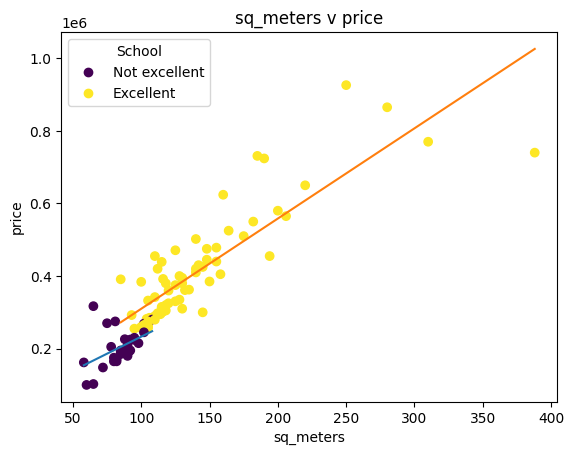

In [11]:
from matplotlib import pyplot as plt
import numpy as np
names = ["Not excellent", "Excellent"]
plt.title("sq_meters v price")
plt.xlabel("sq_meters")
plt.ylabel("price")
scatter = plt.scatter(sq_meters, prices, c=excellent_secondary_school)
plt.legend(handles = scatter.legend_elements()[0], labels=names, title="School")
plt.plot(np.unique(ne_sqm), np.poly1d(np.polyfit(ne_sqm, ne_price, 1))(np.unique(ne_sqm)))
plt.plot(np.unique(e_sqm), np.poly1d(np.polyfit(e_sqm, e_price, 1))(np.unique(e_sqm)))

- Scatterplot or price vs sqft shows a pretty linear relationship
- Smaller homes have smaller prices and larger homes have larger prices
- Not excellent are consistently below excellent
- For a house of 100sqm the average price of not excellent is about 7500 less than excellent

In [12]:
labels = []
for i in range(len(location_quadrant)):
    if location_quadrant[i] == 'N':
        labels.append(0)
    elif location_quadrant[i] == 'S':
        labels.append(1)
    elif location_quadrant[i] == 'E':
        labels.append(2)
    else:
        labels.append(3)
        

In [13]:
north_sqm = []
north_price = []
south_sqm = []
south_price = []
east_sqm = []
east_price = []
west_sqm = []
west_price = []

for i in range(len(location_quadrant)):
    if location_quadrant[i] == 'N':
        north_sqm.append(sq_meters[i])
        north_price.append(prices[i])
    elif location_quadrant[i] == 'S':
        south_sqm.append(sq_meters[i])
        south_price.append(prices[i])
    elif location_quadrant[i] == 'E':
        east_sqm.append(sq_meters[i])
        east_price.append(prices[i])
    else:
        west_sqm.append(sq_meters[i])
        west_price.append(prices[i])


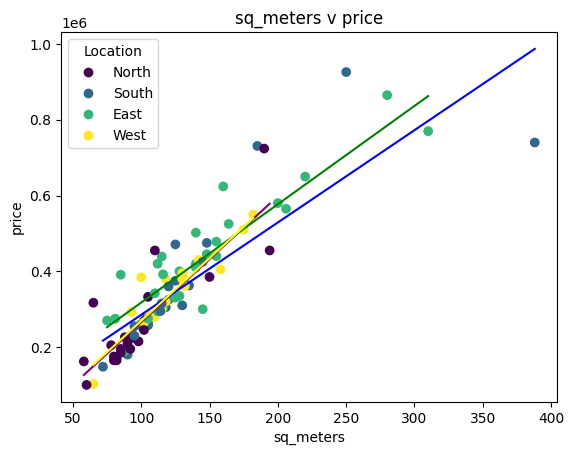

In [25]:
from matplotlib import pyplot as plt
import numpy as np
names = ["North", "South", "East", "West"]
plt.title("sq_meters v price")
plt.xlabel("sq_meters")
plt.ylabel("price")
scatter = plt.scatter(sq_meters, prices, c=labels)
plt.legend(handles = scatter.legend_elements()[0], labels=names, title="Location")
plt.plot(np.unique(north_sqm), np.poly1d(np.polyfit(north_sqm, north_price, 1))(np.unique(north_sqm)), color='purple')
plt.plot(np.unique(south_sqm), np.poly1d(np.polyfit(south_sqm, south_price, 1))(np.unique(south_sqm)), color='blue')
plt.plot(np.unique(east_sqm), np.poly1d(np.polyfit(east_sqm, east_price, 1))(np.unique(east_sqm)), color='green')
plt.plot(np.unique(west_sqm), np.poly1d(np.polyfit(west_sqm, west_price, 1))(np.unique(west_sqm)), color = 'yellow')

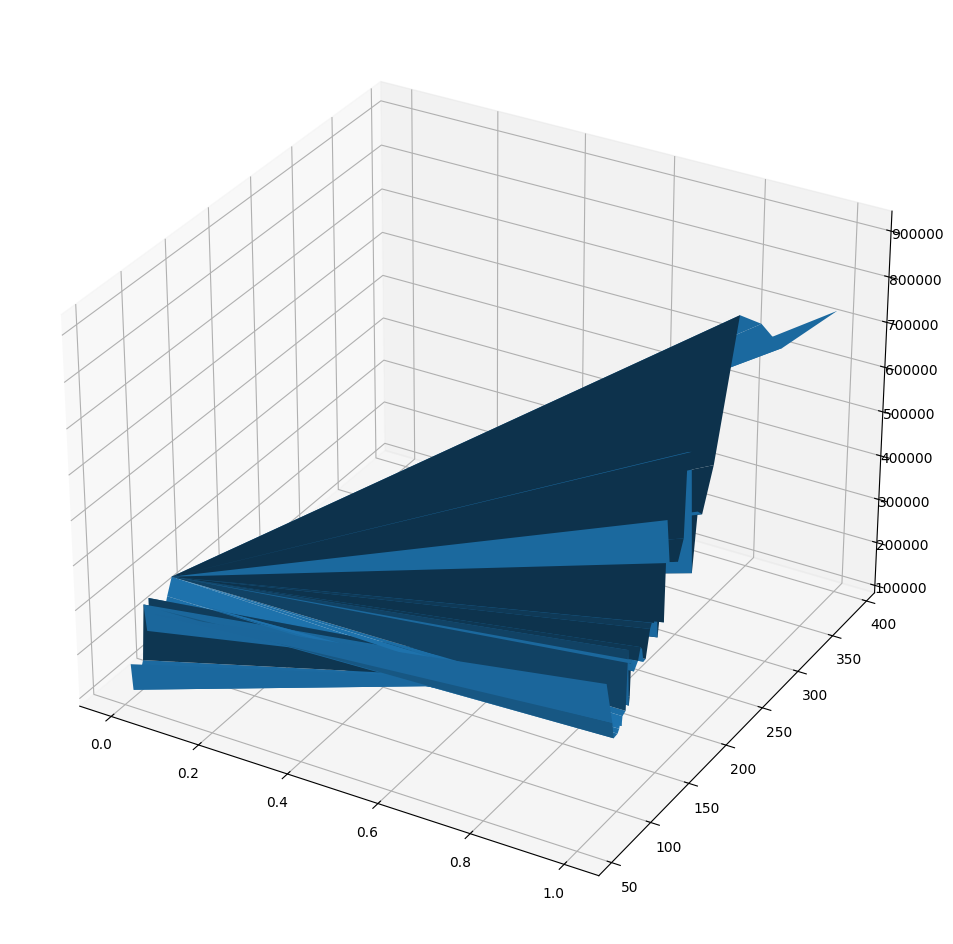

In [27]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize= (14,12))
ax = plt.axes(projection='3d')
x = np.array(excellent_secondary_school)
y = np.array(sq_meters)
z = np.array(prices)
ax.plot_trisurf(x, y, z)
plt.show()

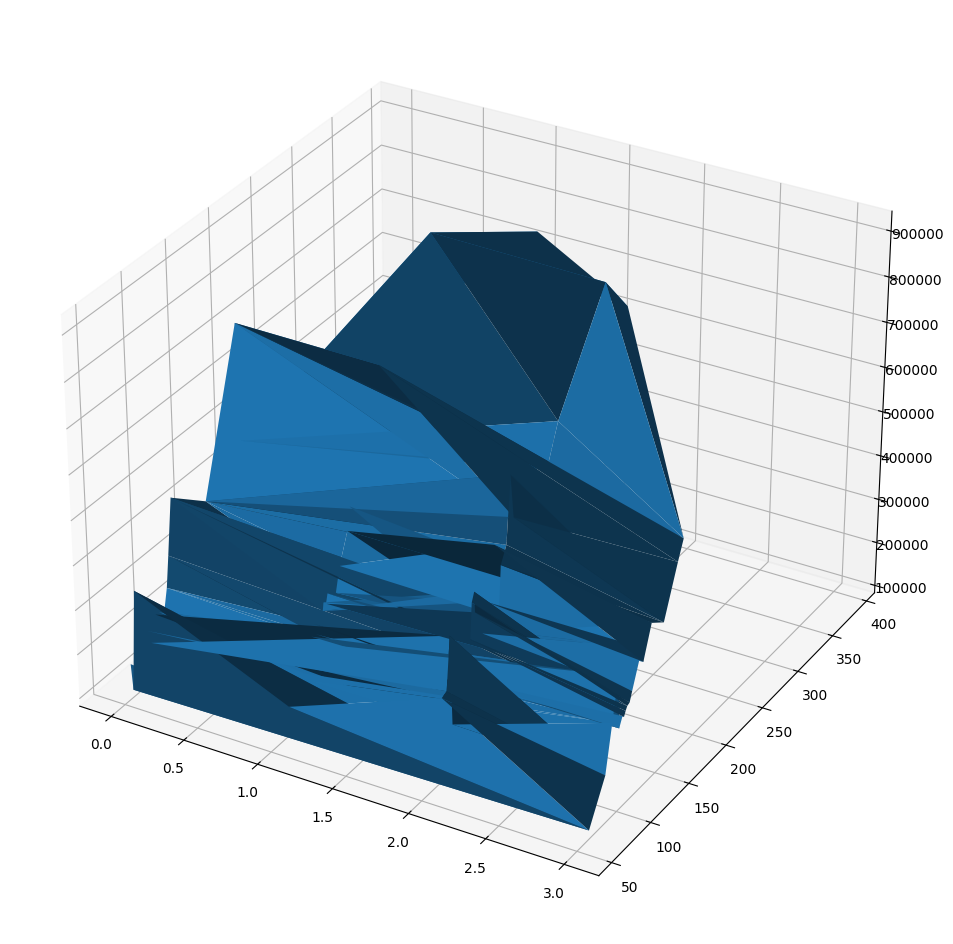

In [28]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize= (14,12))
ax = plt.axes(projection='3d')
x = np.array(labels)
y = np.array(sq_meters)
z = np.array(prices)
ax.plot_trisurf(x, y, z)
plt.show()

$E(y) = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3 + \beta_4x_4 + \beta_5x_5$

In [30]:
north = []
south = []
east = []

for i in range(len(location_quadrant)):
    if location_quadrant[i] == 'N':
        north.append(1)
        south.append(0)
        east.append(0)
    elif location_quadrant[i] == 'S':
        north.append(0)
        south.append(1)
        east.append(0)
    elif location_quadrant[i] == 'E':
        north.append(0)
        south.append(0)
        east.append(1)
    else:
        north.append(0)
        south.append(0)
        east.append(0)
        

In [31]:
all_data = list(zip(sq_meters, excellent_secondary_school, north, south, east))
print(all_data)

[(164, True, 0, 0, 1), (91, False, 0, 1, 0), (75, False, 0, 0, 1), (104, True, 0, 1, 0), (93, True, 0, 0, 0), (206, True, 0, 0, 1), (150, True, 1, 0, 0), (118, True, 0, 0, 0), (130, True, 0, 1, 0), (182, True, 0, 0, 0), (158, True, 0, 0, 0), (105, True, 1, 0, 0), (128, True, 0, 0, 1), (81, False, 0, 0, 1), (194, True, 1, 0, 0), (148, True, 0, 0, 1), (112, True, 0, 0, 1), (388, True, 0, 1, 0), (58, False, 1, 0, 0), (145, True, 0, 0, 1), (116, True, 0, 0, 1), (106, True, 0, 0, 0), (95, True, 0, 1, 0), (85, False, 0, 0, 0), (148, True, 0, 1, 0), (155, True, 0, 0, 1), (78, False, 1, 0, 0), (140, True, 0, 0, 1), (102, False, 1, 0, 0), (280, True, 0, 0, 1), (120, True, 0, 1, 0), (125, True, 0, 1, 0), (130, True, 0, 0, 1), (88, False, 1, 0, 0), (310, True, 0, 0, 1), (72, False, 0, 1, 0), (80, False, 1, 0, 0), (92, False, 1, 0, 0), (82, False, 1, 0, 0), (142, True, 0, 0, 0), (115, True, 0, 1, 0), (110, True, 0, 0, 0), (120, True, 0, 1, 0), (105, True, 0, 1, 0), (90, False, 0, 1, 0), (65, False

In [33]:
import statsmodels.api as sm
all_data_c = sm.add_constant(all_data)
model = sm.OLS(prices, all_data_c)
result = model.fit()
print(result.summary())
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     81.92
Date:                Mon, 16 Feb 2026   Prob (F-statistic):           1.02e-32
Time:                        16:19:58   Log-Likelihood:                -1255.4
No. Observations:                 100   AIC:                             2523.
Df Residuals:                      94   BIC:                             2538.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.976e+04   2.56e+04     -0.771      0.4

There are 8 different regression equations - ESS, NESS, ESN, NESN, ESE, NESE, ESW, NESW
- ESN $-19670 + 2424x_1 + 74270(1) + 23290(1)$
- NESN $-19670 + 2424x_1 + 23290(1)$
- ESS $-19670 + 2424x_1 + 74270(1) + 472(1)$
- NESS $-19670 + 2424x_1 + 472(1)$
- ESE $-19670 + 2424x_1 + 74270(1) + 35310(1)$
- NESE $-19670 + 2424x_1 + 35310(1)$
- ESW $-19670 + 2424x_1 + 74270(1)$
- NESW $-19670 + 2424x_1$


In [62]:
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim() + (50, 300))
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

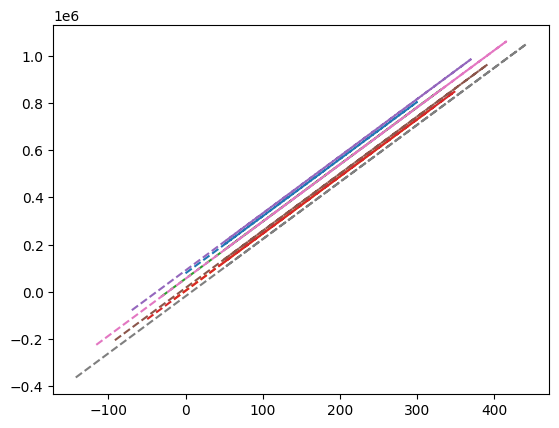

In [61]:
abline(2424, (-19670+74270+23290))
abline(2424, (-19670+23290))
abline(2424, (-19670+74270+472))
abline(2424, (-19670+23290))
abline(2424, (-19670+74270+35310))
abline(2424, (-19670+35310))
abline(2424, (-19670+74270))
abline(2424, (-19670))

**Keeping or excluding features**
- $y$ = price of a house in 1000s, dependent variable
- $x_1$ = square ft
- $x_2$ = excellent secondary school
- $x_3$ = number of bedrooms
- $x_4$ = number of bathrooms

In [59]:

print(sq_meters)

[164, 91, 75, 104, 93, 206, 150, 118, 130, 182, 158, 105, 128, 81, 194, 148, 112, 388, 58, 145, 116, 106, 95, 85, 148, 155, 78, 140, 102, 280, 120, 125, 130, 88, 310, 72, 80, 92, 82, 142, 115, 110, 120, 105, 90, 65, 88, 135, 108, 85, 102, 132, 60, 82, 110, 125, 160, 140, 185, 250, 100, 115, 190, 65, 85, 110, 112, 105, 95, 80, 130, 100, 125, 118, 115, 105, 110, 116, 100, 102, 112, 115, 114, 175, 145, 130, 92, 98, 128, 140, 155, 118, 105, 95, 85, 200, 220, 102, 90, 115]
